## Percobaan_3

code berikut merupakan library yang dipakai pada jurnal modul ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import pandas untuk memanipulasi dan menganalisis data tabular dalam bentuk DataFrames
5.import os untuk operasi sistem seperti manipulasi file dan direktori
6.import math untuk operasi matematika dasar seperti trigonometri, logaritma, dan operasi aritmatika.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Finger/"+label): 
            img = cv2.imread(os.path.join("Finger/"+label,filename)) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                # Pastikan gambar memiliki 3 saluran warna (RGB)
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
                
                # Mendapatkan dimensi gambar
                height, width, _ = img.shape
                
                # Menyesuaikan ukuran gambar menjadi 150x150 secara manual
                if height > 150 or width > 150:
                    if height > width:
                        scale_factor = 150 / height
                    else:
                        scale_factor = 150 / width
                    new_height = int(height * scale_factor)
                    new_width = int(width * scale_factor)
                    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
                    for i in range(new_height):
                        for j in range(new_width):
                            resized_img[i, j, :] = img[int(i / scale_factor), int(j / scale_factor), :]
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - new_height) // 2
                    start_col = (150 - new_width) // 2
                    padded_img[start_row:start_row+new_height, start_col:start_col+new_width] = resized_img
                else:
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - height) // 2
                    start_col = (150 - width) // 2
                    padded_img[start_row:start_row+height, start_col:start_col+width] = img
                
                images.append(padded_img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Finger")


Fungsi insertGambar diatas digunakan untuk memuat gambar dari folder yang mengandung subfolder yang diberi label, dan kemudian memproses gambar yang ada untuk keperluan lebih lanjut. pertama-tama daftar kosong untuk gambar (images), nama file (filenames), dan label (labels) dibuat. Kemudian, fungsi akan menjelajahi setiap subfolder dalam folder utama yang diberikan ("Finger"), dan membaca setiap gambar di dalamnya. Nama file dan labelnya disimpan dalam daftar yang sesuai. Jika gambar tidak kosong, fungsi memastikan gambar memiliki tiga saluran warna (RGB). Selanjutnya, gambar diubah ukurannya secara manual menjadi 150x150 piksel dengan mempertahankan rasio aspeknya, dan gambar yang diubah ukurannya ditempatkan di tengah-tengah kanvas hitam berukuran 150x150. Gambar yang diproses kemudian ditambahkan ke daftar images. Akhirnya, fungsi mengembalikan tiga daftar: gambar yang diproses, nama file, dan label masing-masing gambar.

In [3]:
def eksplorasiData(images, labels):
    # Jumlah data
    print(f"Jumlah total gambar: {len(images)}")
    
    if len(images) == 0:
        print("Tidak ada gambar yang ditemukan.")
        return
    
    # Distribusi data per label
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    # Menampilkan histogram distribusi data
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    # Menampilkan sampel data
    num_samples = min(9, len(images))  # Menyesuaikan jumlah sampel jika gambar kurang dari 9
    if num_samples > 0:
        sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
        plt.figure(figsize=(15, 5))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Label: {labels[idx]}")
            plt.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang cukup untuk ditampilkan sebagai sampel.")


Fungsi eksplorasiData daiatas digunakan untuk melakukan eksplorasi data pada gambar dan label yang diberikan. Pertama, fungsi ini mencetak jumlah total gambar yang ada. Jika tidak ada gambar yang ditemukan, fungsi akan mengeluarkan pesan dan berhenti. Selanjutnya, fungsi menghitung dan mencetak distribusi gambar berdasarkan labelnya, lalu menampilkan histogram yang menggambarkan distribusi data per label dengan menggunakan matplotlib. fungsi ini juga menampilkan sejumlah sampel gambar (maksimal 9) dengan memilih indeks secara acak, kemudian menampilkan gambar-gambar tersebut bersama dengan labelnya. Jika jumlah gambar kurang dari 9, fungsi akan menampilkan semua gambar yang ada.

Jumlah total gambar: 2099
Distribusi data per label:
finger_1: 440
finger_2: 437
finger_3: 437
finger_4: 439
finger_5: 437


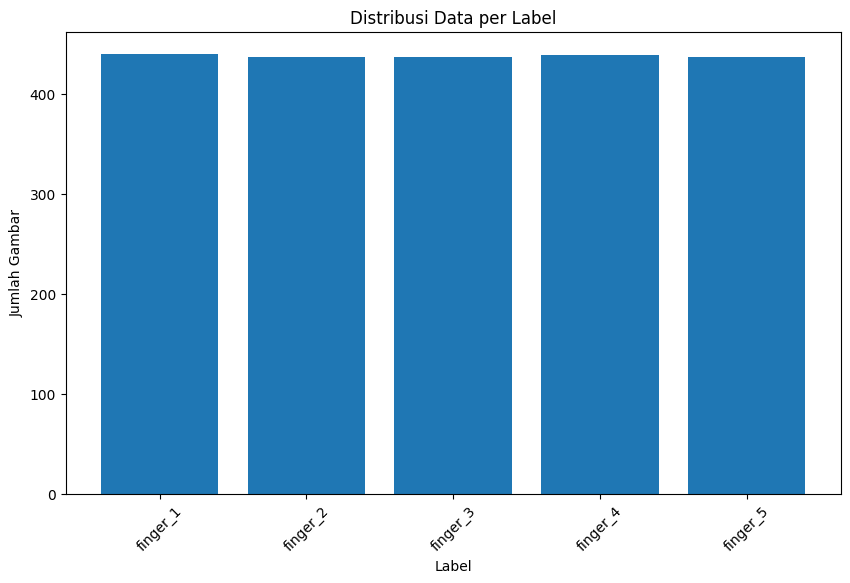

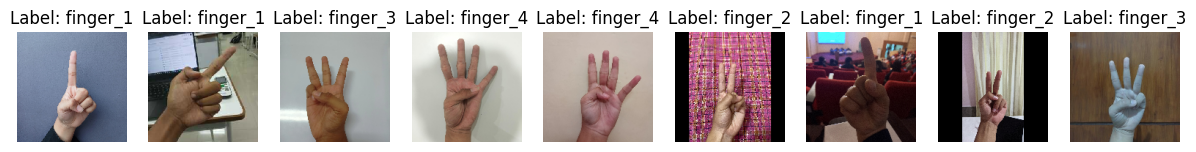

Label: finger_1


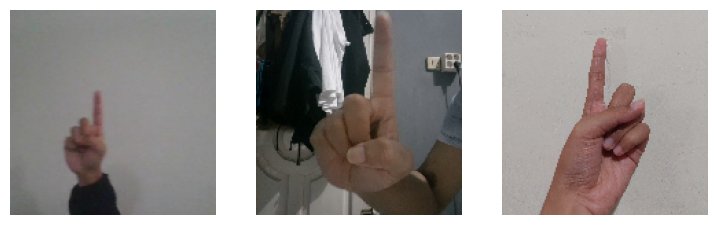

Label: finger_2


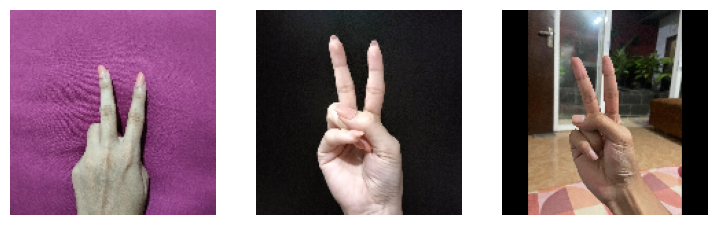

Label: finger_3


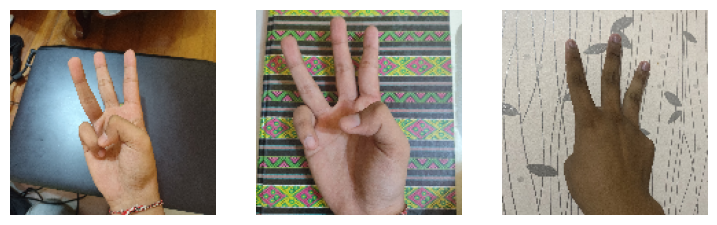

Label: finger_4


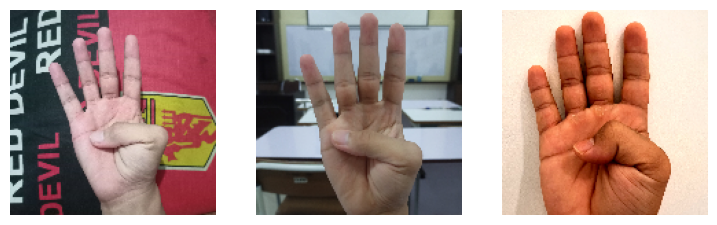

Label: finger_5


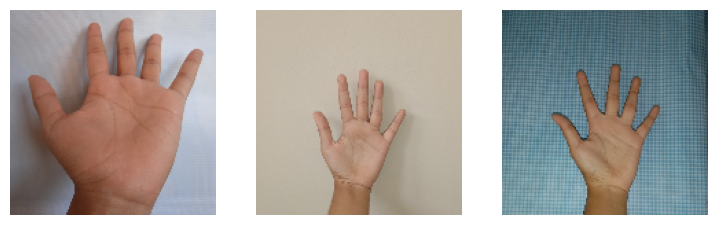

In [4]:
def display_samples(images, labels, num_samples=3):
    unique_folders = ["Finger/finger_1",
                      "Finger/finger_2",
                      "Finger/finger_3",
                      "Finger/finger_4",
                      "Finger/finger_5"]

    for folder in unique_folders:
        label = folder.split("/")[-1]  # Ambil label dari nama folder
        label_indices = [i for i in range(len(labels)) if labels[i] == label]
        num_samples = min(num_samples, len(label_indices))
        if num_samples == 0:
            print(f"Tidak ada gambar untuk label: {label}")
            continue
        print(f"Label: {label}")
        plt.figure(figsize=(num_samples * 3, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[label_indices[i]], cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.show()

# Contoh penggunaan
folder_path = "Finger"
images, filenames, labels = insertGambar(folder_path)
eksplorasiData(images, labels)
# Tampilkan 3 sampel gambar dari setiap kategori label
display_samples(images, labels, num_samples=3)


Fungsi display_samples diats digunakan untuk menampilkan beberapa sampel gambar dari setiap kategori label yang terdapat dalam folder tertentu. Fungsi ini menerima tiga parameter yiatu daftar gambar (images), daftar label (labels), dan jumlah sampel yang ingin ditampilkan untuk setiap label (num_samples, default 3). Pertama, fungsi mendefinisikan daftar folder unik yang mewakili label yang berbeda. Untuk setiap folder, fungsi mengambil nama label dari nama folder dan menemukan indeks gambar yang sesuai dengan label tersebut. Fungsi kemudian menampilkan hingga num_samples gambar dari setiap label menggunakan matplotlib. Jika tidak ada gambar untuk suatu label, fungsi mengeluarkan pesan yang sesuai. Contoh penggunaan fungsi ini melibatkan pemanggilan insertGambar untuk memuat gambar dan label dari folder, diikuti oleh eksplorasiData untuk menganalisis distribusi data, dan kemudian display_samples untuk menampilkan sampel gambar dari setiap label.

#### Preprocessing n

Label: finger_1


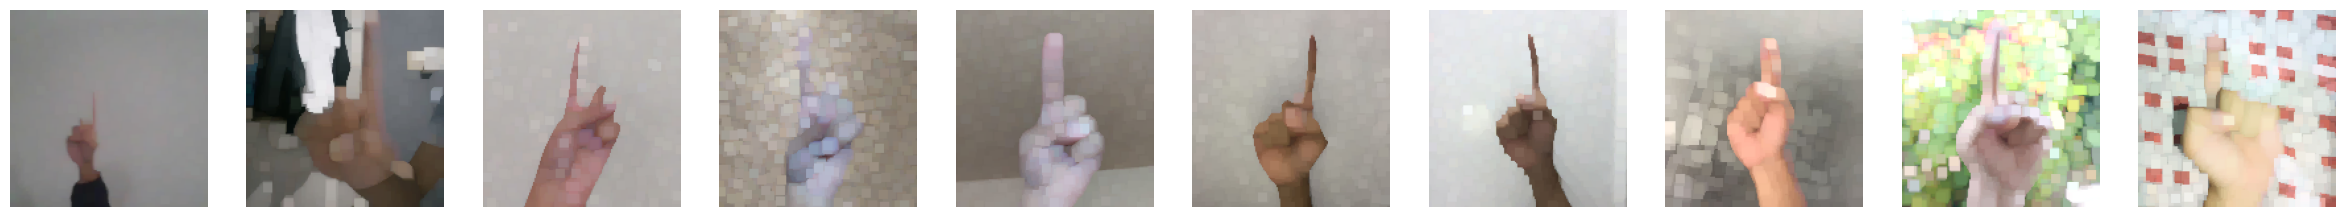

Label: finger_2


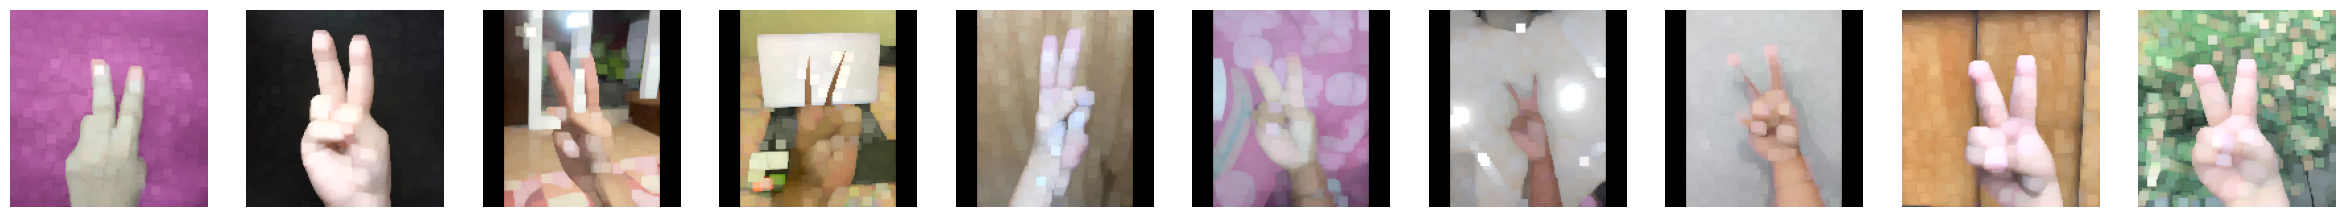

Label: finger_3


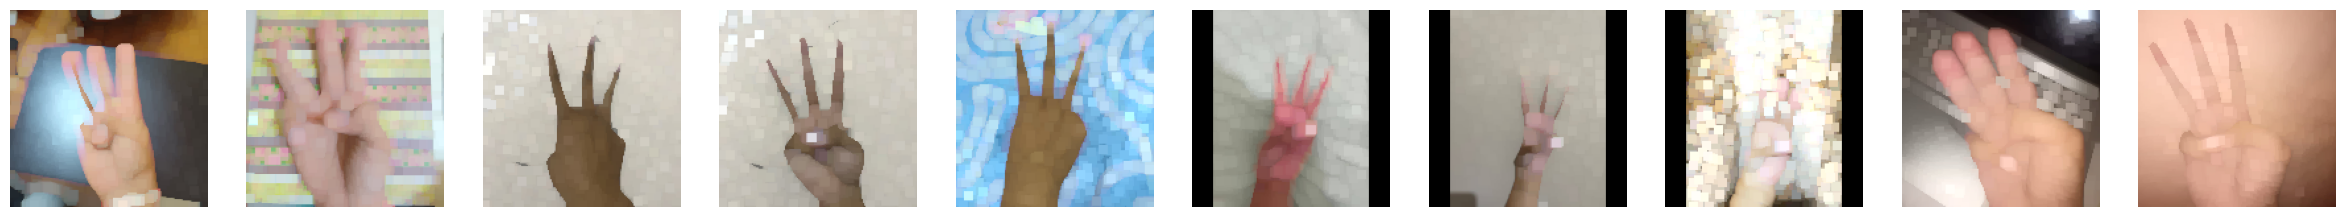

Label: finger_4


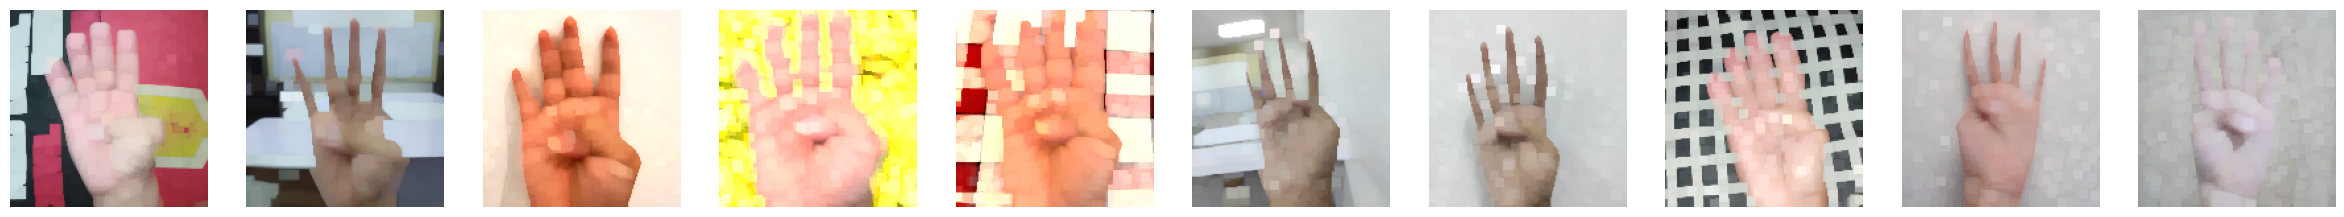

Label: finger_5


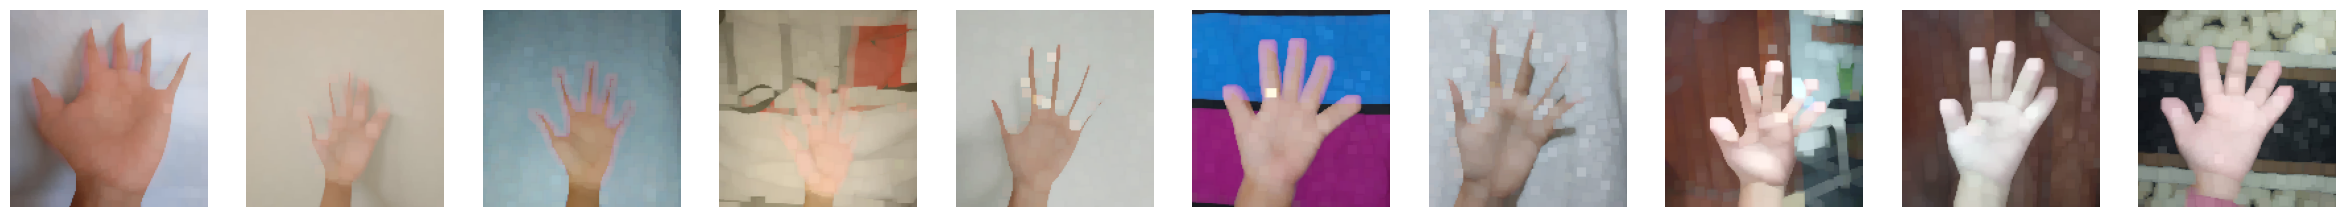

In [5]:
def custom_dilate(images, kernel_size=(5, 5)):
    dilated_images = []
    
    kernel = np.ones(kernel_size, np.uint8)
    
    for img in images:
        if img is None:
            continue  # Lewatkan gambar yang gagal dimuat
        
        # Lakukan operasi dilatasi menggunakan teknik morfologi
        dilated_img = cv2.dilate(img, kernel, iterations=1)
        
        dilated_images.append(dilated_img)
    
    return dilated_images

# Dilatasi gambar dengan bentuk berbeda
dilated_images_custom = custom_dilate(images, kernel_size=(7, 7))  # Misalnya, menggunakan kernel berukuran (7, 7)

# Tampilkan gambar yang sudah didilatasi dengan bentuk berbeda
display_samples(dilated_images_custom, labels, num_samples=10)


Fungsi translate_images daiatsb digunakan untuk melakukan translasi acak pada setiap gambar didalam daftar gambar yang diberikan. Fungsi ini menerima dua parameter yaitu daftar gambar (images) dan jumlah perpindahan maksimum (max_shift, default 50). Untuk setiap gambar, fungsi menghitung perpindahan acak dalam kisaran -max_shift hingga max_shift untuk sumbu x dan y, kemudian menerapkan translasi menggunakan matriks translasi dan fungsi cv2.warpAffine. Gambar yang telah ditranslasi disimpan dalam daftar translated_images, sementara perpindahan yang diterapkan disimpan dalam daftar shifts. Fungsi mengembalikan kedua daftar tersebut. gambar-gambar diambil dari folder, lalu dilakukan translasi dan perpindahan yang diterapkan dicetak. Setelah itu, gambar-gambar yang telah ditranslasi ditampilkan menggunakan fungsi display_samples.

### Feature Extraction

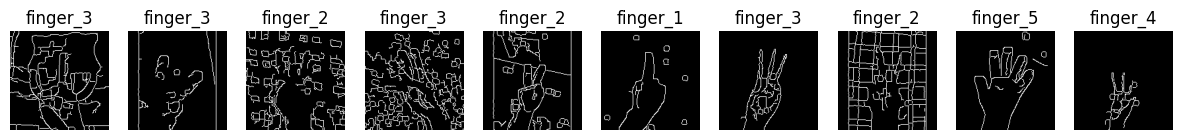

In [6]:
def edge_detection(images, low_threshold=50, high_threshold=150):
    edge_detected_images = []

    for img in images:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Deteksi tepi menggunakan operator Canny
        edges = cv2.Canny(gray_image, low_threshold, high_threshold)
        
        edge_detected_images.append(edges)
    
    return edge_detected_images

def display_edge_samples(images, labels, num_samples=10):
    num_samples = min(num_samples, len(images))
    label_indices = np.random.choice(len(images), num_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(label_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()

# Deteksi tepi pada gambar yang sudah ditranslasi
edge_detected_translated_images = edge_detection(dilated_images_custom)

# Tampilkan gambar yang telah diproses dengan deteksi tepi
display_edge_samples(edge_detected_translated_images, labels, num_samples=10)



Kode diaatas melakukan proses thresholding pada citra yang telah ditranslasi, lalu menampilkannya. Pertama, dua daftar kosong tresh dan thresholded_images dibuat untuk menyimpan citra hasil thresholding. Untuk setiap citra dalam translated_images, citra diubah ke skala abu-abu menggunakan cv2.cvtColor. Kemudian, thresholding biner diterapkan dengan ambang batas 127 menggunakan cv2.threshold, yang menghasilkan citra biner dimana piksel dengan nilai di atas 127 menjadi putih (255) dan di bawahnya menjadi hitam (0). Citra hasil thresholding ditambahkan ke dalam daftar tresh dan thresholded_images. dan terakhir, hingga tujuh citra hasil thresholding ditampilkan menggunakan matplotlib, dengan setiap citra ditampilkan dalam subplot terpisah.

In [7]:
def calculate_glcm(edge_image):
    glcm_matrices = []
    angles = [0, 45, 90, 135]
    distances = [1, 2, 3, 4, 5]
    symmetric = True 
    
    for angle in angles:
        for distance in distances:
            glcm = np.zeros((256, 256))  
            rows, cols = edge_image.shape

            for i in range(rows):
                for j in range(cols):
                    current_pixel = edge_image[i, j]
                    neighbor_pixel_x = i + distance * np.cos(np.radians(angle))
                    neighbor_pixel_y = j - distance * np.sin(np.radians(angle))

                    if 0 <= neighbor_pixel_x < rows and 0 <= neighbor_pixel_y < cols:
                        neighbor_pixel = edge_image[int(neighbor_pixel_x), int(neighbor_pixel_y)]
                        glcm[current_pixel, neighbor_pixel] += 1
                        
                        if symmetric:
                            glcm[neighbor_pixel, current_pixel] += 1

            glcm_matrices.append(glcm)
    
    return glcm_matrices


Fungsi calculate_glcm diatas digunakan untuk menghitung matriks co-occurrence tingkat abu-abu (GLCM) untuk citra tepi yang diberikan. Fungsi ini menginisialisasi daftar kosong glcm_matrices dan mendefinisikan sudut (0, 45, 90, 135 derajat) serta jarak (1 hingga 5 piksel) untuk perhitungan GLCM. Untuk setiap kombinasi sudut dan jarak, matriks GLCM berukuran 256x256 diinisialisasi, yang diasumsikan untuk citra 8-bit. Kemudian, fungsi melakukan iterasi melalui setiap piksel dalam citra dan menghitung koordinat piksel tetangga berdasarkan sudut dan jarak yang ditentukan. Jika koordinat tetangga berada dalam batas citra, nilai GLCM ditingkatkan sesuai dengan intensitas piksel saat ini dan tetangganya. Jika matriks GLCM diasumsikan simetris, nilai di posisi terbalik juga ditingkatkan. Hasilnya adalah daftar matriks GLCM untuk setiap kombinasi sudut dan jarak yang dikembalikan oleh fungsi.

In [8]:
def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
        # Normalisasi matriks GLCM
        glcm_matrix_normalized = glcm_matrix / np.sum(glcm_matrix)
        
        # Hitung fitur
        contrast = np.sum(glcm_matrix_normalized * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix_normalized * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix_normalized / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix_normalized))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix_normalized)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix_normalized)) * glcm_matrix_normalized / 
                             (np.std(glcm_matrix_normalized) ** 2))
        entropy = -np.sum(glcm_matrix_normalized * np.log(glcm_matrix_normalized + 1e-10))
        asm = np.sum(np.square(glcm_matrix_normalized))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features

Fungsi calculate_glcm_features diatas digunakna untuk menghitung berbagai fitur tekstur dari matriks GLCM yang diberikan. Fungsi ini menerima daftar matriks GLCM (glcm_matrices) dan menghasilkan daftar fitur untuk masing-masing matriks. Setiap matriks GLCM dinormalisasi dengan membagi setiap elemen dengan jumlah total elemen dalam matriks. Kemudian, beberapa fitur tekstur dihitung, termasuk kontras (contrast), dissimilarity, homogenitas (homogeneity), energi (energy), korelasi (correlation), entropi (entropy), dan second angular moment (ASM). Fitur-fitur ini dihitung berdasarkan operasi matematika yang dari elemen-elemen matriks GLCM yang dinormalisasi. Hasil dari perhitungan ini adalah daftar kamus yang berisi nilai-nilai fitur untuk setiap matriks GLCM, yang kemudian dikembalikan oleh fungsi.

In [9]:
edge_images_prewitt_manual = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

df = pd.DataFrame(data, columns=columns)

print(df)
df.head()

    Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0       1       0.0            0.0          1.0  0.000066  2.779846e+13   
1       2       0.0            0.0          1.0  0.000067  2.729753e+13   
2       3       0.0            0.0          1.0  0.000068  2.680592e+13   
3       4       0.0            0.0          1.0  0.000068  2.681683e+13   
4       5       0.0            0.0          1.0  0.000069  2.634200e+13   
5       6       0.0            0.0          1.0  0.000067  2.725444e+13   
6       7       0.0            0.0          1.0  0.000067  2.708277e+13   
7       8       0.0            0.0          1.0  0.000069  2.633952e+13   
8       9       0.0            0.0          1.0  0.000069  2.633952e+13   
9      10       0.0            0.0          1.0  0.000070  2.590275e+13   
10     11       0.0            0.0          1.0  0.000067  2.725444e+13   
11     12       0.0            0.0          1.0  0.000067  2.721935e+13   
12     13       0.0      

,Image,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Entropy,ASM,contrast_0,dissimilarity_0,...,correlation_90,asm_90,entropy_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135,asm_135,entropy_135
0,1,0.0,0.0,1.0,0.000066,2.779846e+13,9.695017,0.000066,0.0,0.0,...,2.779846e+13,9.695017,0.000066,0.0,0.0,1.0,0.000066,2.779846e+13,9.695017,0.000066
1,2,0.0,0.0,1.0,0.000067,2.729753e+13,9.679367,0.000067,0.0,0.0,...,2.729753e+13,9.679367,0.000067,0.0,0.0,1.0,0.000067,2.729753e+13,9.679367,0.000067
2,3,0.0,0.0,1.0,0.000068,2.680592e+13,9.667518,0.000068,0.0,0.0,...,2.680592e+13,9.667518,0.000068,0.0,0.0,1.0,0.000068,2.680592e+13,9.667518,0.000068
3,4,0.0,0.0,1.0,0.000068,2.681683e+13,9.664694,0.000068,0.0,0.0,...,2.681683e+13,9.664694,0.000068,0.0,0.0,1.0,0.000068,2.681683e+13,9.664694,0.000068
4,5,0.0,0.0,1.0,0.000069,2.634200e+13,9.653494,0.000069,0.0,0.0,...,2.634200e+13,9.653494,0.000069,0.0,0.0,1.0,0.000069,2.634200e+13,9.653494,0.000069


Kode diatas akan menghasilkan citra tepi acak menggunakan metode Prewitt, menghitung matriks GLCM dari citra-citra tersebut, lalu menghitung fitur tekstur dari setiap matriks GLCM. Dua citra acak berukuran 100x100 piksel dihasilkan dan disimpan dalam edge_images_prewitt_manual. Untuk setiap citra, matriks GLCM dihitung menggunakan fungsi calculate_glcm dan fitur-fitur tekstur dari matriks-matriks tersebut dihitung menggunakan fungsi calculate_glcm_features. Hasil fitur tekstur ini disimpan dalam daftar glcm_features. 
setelah itu, data fitur dimasukkan ke dalam sebuah DataFrame pandas. DataFrame ini memiliki kolom yang berisi nama gambar serta fitur tekstur seperti kontras, dissimilarity, homogenitas, energi, korelasi, entropi, dan ASM, untuk setiap sudut (0, 45, 90, 135 derajat). Setiap baris DataFrame mewakili fitur tekstur dari satu matriks GLCM. dan akhirnya, DataFrame ditampilkan dengan menggunakan print(df) dan df.head() untuk menampilkan lima baris pertama dari DataFrame tersebut.

### Features Selection

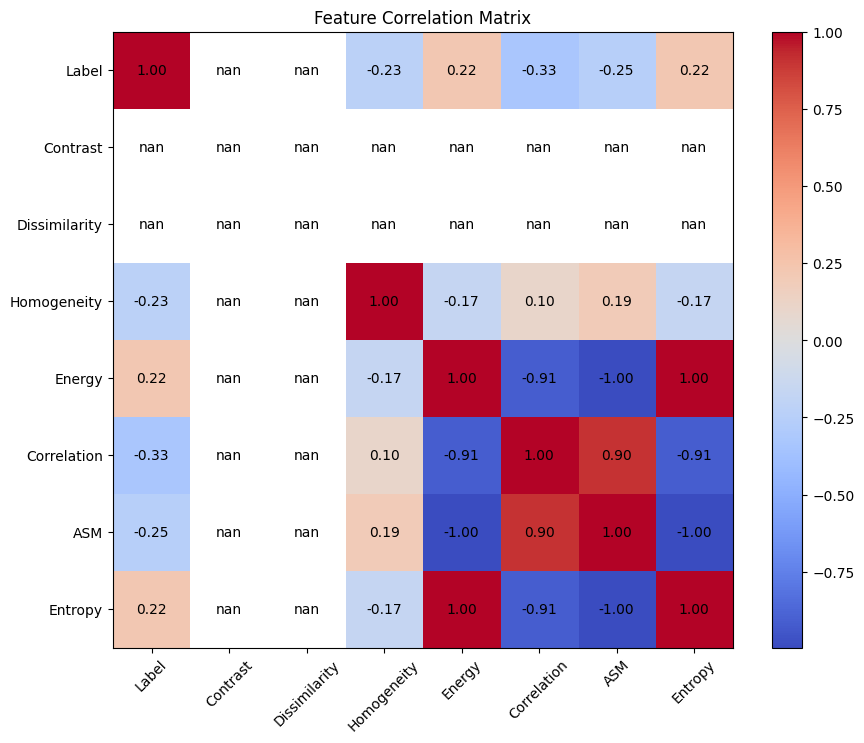

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000066   
1  Filename_1      1       0.0            0.0          1.0  0.000067   
2  Filename_2     12       0.0            0.0          1.0  0.000067   
3  Filename_3     23       0.0            0.0          1.0  0.000068   
4  Filename_4     34       0.0            0.0          1.0  0.000068   

    Correlation       ASM   Entropy  
0  2.787037e+13  9.689630  0.000066  
1  2.758022e+13  9.681431  0.000067  
2  2.737397e+13  9.673477  0.000067  
3  2.713887e+13  9.668321  0.000068  
4  2.691513e+13  9.659291  0.000068  


In [10]:
def feature_selection_correlation(results_data):
    data_list = []
    columns_list = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for filename, label, features_dict in results_data:
        row = [filename, label]
        row.extend(features_dict.values())
        data_list.append(row)
    
    df_data = pd.DataFrame(data_list, columns=columns_list)
    
    df_data['Label'] = df_data['Label'].astype('category').cat.codes
    
    numeric_df = df_data.drop(columns=['Filename'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    
    xticks_labels = list(correlation_matrix.columns)
    yticks_labels = list(correlation_matrix.index)
    
    plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)
    plt.yticks(range(len(yticks_labels)), yticks_labels)
    
    for i in range(len(xticks_labels)):
        for j in range(len(yticks_labels)):
            plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = correlation_matrix['Label'][(correlation_matrix['Label'] > 0.99) | (correlation_matrix['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df_data, selected_features

edge_images_prewitt_manual = [
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]
glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

results_data = []
for i, features in enumerate(glcm_features):
    results_data.append((f'Filename_{i}', f'Label_{i}', features))

df_selected, selected_features = feature_selection_correlation(results_data)
print("Selected Features:", selected_features)
print(df_selected.head())


Fungsi feature_selection_correlation diatas digunakan untuk melakukan seleksi fitur berdasarkan korelasi antar fitur tekstur yang dihitung dari citra tepi. Fungsi ini menerima daftar results_data yang berisi nama file, label, dan fitur GLCM untuk setiap citra. Data tersebut kemudian dimasukkan ke dalam sebuah DataFrame pandas dengan kolom yang mencakup nama file, label, dan berbagai fitur GLCM (kontras, dissimilarity, homogenitas, energi, korelasi, ASM, dan entropi). Label diubah menjadi kode kategori numerik untuk memungkinkan perhitungan korelasi.
Setelah itu, matriks korelasi dihitung dan ditampilkan sebagai gambar dengan menggunakan matplotlib. Setiap elemen dalam matriks korelasi menunjukkan tingkat korelasi antara dua fitur. Fitur-fitur yang memiliki korelasi tinggi (lebih dari 0.99 atau kurang dari -0.99) dengan label dipilih dan dicetak sebagai fitur yang terpilih.
lalu, dua citra tepi acak dihasilkan, dan matriks GLCM serta fitur GLCM dihitung untuk masing-masing citra. Data fitur tersebut kemudian dimasukkan ke dalam daftar results_data dan fungsi feature_selection_correlation dipanggil untuk melakukan seleksi fitur. Hasil seleksi fitur dan lima baris pertama dari DataFrame yang dihasilkan ditampilkan.

### Splitting Data

In [11]:
def custom_train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(data)
    test_indices = np.random.choice(num_samples, int(num_samples * test_size), replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = data.iloc[train_indices].drop(columns=['Label'])
    X_test = data.iloc[test_indices].drop(columns=['Label'])
    y_train = data.iloc[train_indices]['Label']
    y_test = data.iloc[test_indices]['Label']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(df_selected, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32, 8)
Testing data shape: (8, 8)


Fungsi custom_train_test_split diatas digunakan untuk membagi data menjadi set pelatihan dan pengujian sesuai dengan proporsi yang ditentukan, dengan pilihan untuk menentukan seed untuk pengacakan data. Fungsi ini menerima satu parameter yaitu data, yang merupakan DataFrame yang berisi fitur-fitur dan label. Fitur-fitur tersebut dipisahkan menjadi dua bagian yaitu X_train yang berisi fitur-fitur data pelatihan dan X_test yang berisi fitur-fitur data pengujian. Label-label yang sesuai dipisahkan ke dalam y_train dan y_test.
DataFrame df_selected digunakan sebagai data input, di mana kolom "Label" adalah kolom target yang akan diprediksi. Proporsi pengujian 20% dipilih, dan seed 42 digunakan untuk pengacakan. Setelah memanggil fungsi, ukuran data pelatihan dan pengujian dicetak sebagai keluaran.

### Normalization

In [12]:
# Definisi data latih dan data uji
X_train = df_selected.iloc[:, 1:]  # Mengambil kolom-kolom kecuali kolom pertama (Filename)
X_test = df_selected.iloc[:, 1:]  # Mengambil kolom-kolom kecuali kolom pertama (Filename)

# Fungsi normalisasi min-max
def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Normalisasi data latih
X_train_normalized = X_train.copy()
for column in X_train_normalized.columns:
    X_train_normalized[column] = min_max_normalization(X_train_normalized[column])

# Normalisasi data uji
X_test_normalized = X_test.copy()
for column in X_test_normalized.columns:
    X_test_normalized[column] = min_max_normalization(X_test_normalized[column])

# Menampilkan bentuk data yang telah dinormalisasi
print("Bentuk Data Latih Setelah Normalisasi:", X_train_normalized.shape)
print("Bentuk Data Uji Setelah Normalisasi:", X_test_normalized.shape)


Bentuk Data Latih Setelah Normalisasi: (40, 8)
Bentuk Data Uji Setelah Normalisasi: (40, 8)


dari kode di atas, data latih dan data uji diambil dari DataFrame df_selected, yang dipisahkan dari nama file (Filename) dan hanya berisi fitur-fitur. Data latih dan data uji diatur ke dalam variabel X_train dan X_test.
Kemudian, sebuah fungsi min_max_normalization didefinisikan untuk melakukan normalisasi min-max pada data. Fungsi ini menerima satu parameter yaitu data yang akan dinormalisasi, dan mengembalikan data yang telah dinormalisasi. Normalisasi min-max dilakukan dengan mengurangkan nilai minimum dari setiap kolom dan membaginya dengan selisih antara nilai maksimum dan minimum.
Data X_train dan data X_test disalin ke variabel baru (X_train_normalized dan X_test_normalized) untuk menghindari perubahan langsung pada data asli. Setiap kolom dalam kedua data tersebut dinormalisasi menggunakan fungsi min_max_normalization.
terakhir, bentuk data yang telah dinormalisasi dicetak untuk memverifikasi normalisasi telah dilakukan dengan benar. 

## Modeling

In [13]:
def standardizeData(images):
    images = np.array(images, dtype=np.float32)
    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    standardized_images = (images - mean) / std
    return standardized_images

def train_test_split_manual(images, labels, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(images))
    np.random.shuffle(indices)
    split = int(len(images) * (1 - test_size))
    train_indices = indices[:split]
    test_indices = indices[split:]
    X_train = [images[i] for i in train_indices]
    X_test = [images[i] for i in test_indices]
    y_train = [labels[i] for i in train_indices]
    y_test = [labels[i] for i in test_indices]
    return X_train, X_test, y_train, y_test

def normalize_manual(X_train, X_test):
    X_train = np.array(X_train, dtype=np.float32)
    X_test = np.array(X_test, dtype=np.float32)
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, X_test

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
inverse_label_map = {idx: label for label, idx in label_map.items()}
y_numeric = [label_map[label] for label in labels]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split_manual(images, y_numeric, test_size=0.2, random_state=42)

# Standardisasi data
X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)
X_train, X_test = normalize_manual(X_train, X_test)

# Melatih model SVM
svm_model = SVM()
svm_model.fit(X_train, np.array(y_train).astype(np.float32))

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)
accuracy = np.mean(y_pred == np.where(np.array(y_test) <= 0, -1, 1))

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

print(f"Akurasi model SVM: {accuracy * 100:.2f}%")

Akurasi model SVM: 79.76%


kode diatas merupakan model SVM. Pertama, label-label dikonversi dari string ke nilai numerik untuk pelatihan model. Kemudian, dataset dibagi menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split_manual. Setelah itu, data distandardisasi menggunakan fungsi kustom normalize_manual. Model SVM kemudian diinisialisasi dan dilatih pada data pelatihan yang telah distandardisasi. setelah itu, model memprediksi pada data pengujian yang telah distandardisasi dan menghitung akurasinya. Terakhir, label-label yang diprediksi dikonversi kembali ke format string aslinya untuk tujuan evaluasi, dan akurasi model SVM dicetak.

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
y_numeric = [label_map[label] for label in labels]

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro')
recall = recall_score(y_test_labels, y_pred_labels, average='macro')
f1 = f1_score(y_test_labels, y_pred_labels, average='macro')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Menampilkan hasil evaluasi
print("\nEvaluation Metrics for SVM:")
print("-----------------------------------------------------")
print("| Metric      |        Value                         |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}                            |".format(accuracy))
print("| Precision   |    {:.4f}                            |".format(precision))
print("| Recall      |    {:.4f}                            |".format(recall))
print("| F1-score    |    {:.4f}                            |".format(f1))
print("-----------------------------------------------------")

# Print the confusion matrix
print("\nConfusion Matrix for SVM:")
print(conf_matrix)



Evaluation Metrics for SVM:
-----------------------------------------------------
| Metric      |        Value                         |
-----------------------------------------------------
| Accuracy    |    0.2738                            |
| Precision   |    0.1319                            |
| Recall      |    0.2781                            |
| F1-score    |    0.1670                            |
-----------------------------------------------------

Confusion Matrix for SVM:
[[37  0 35  0  0]
 [23  0 57  0  0]
 [11  0 78  0  0]
 [10  0 81  0  0]
 [ 6  0 82  0  0]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


kode diatas menggunakan sklearn.metrics untuk menghitung beberapa metrik evaluasi klasifikasi seperti akurasi, presisi, recall, dan f1-score.
Pertama, label-label dikonversi dari string ke nilai numerik untuk perhitungan metrik evaluasi. Kemudian, model SVM yang telah dilatih dipakai untuk memprediksi label pada data pengujian. Hasil prediksi dan label asli dikonversi kembali ke format string untuk evaluasi lebih lanjut.
setelah itu, metrik evaluasi seperti akurasi, presisi, recall, dan f1-score dihitung menggunakan fungsi-fungsi yang disediakan oleh sklearn.metrics. Confusion matrix juga dihasilkan menggunakan fungsi confusion_matrix.

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Mengonversi label string menjadi angka
label_map = {label: idx for idx, label in enumerate(set(labels))}
y_numeric = [label_map[label] for label in labels]

# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)

# Mengonversi hasil prediksi kembali ke label string untuk evaluasi
y_pred_labels = [inverse_label_map[0 if pred == -1 else 1] for pred in y_pred]
y_test_labels = [inverse_label_map[actual] for actual in y_test]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)
recall = recall_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)
f1 = f1_score(y_test_labels, y_pred_labels, average='macro', zero_division=0)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Menampilkan hasil evaluasi
print("\nEvaluation Metrics for SVM:")
print("-----------------------------------------------------")
print("| Metric      |        Value                         |")
print("-----------------------------------------------------")
print("| Accuracy    |    {:.4f}                            |".format(accuracy))
print("| Precision   |    {:.4f}                            |".format(precision))
print("| Recall      |    {:.4f}                            |".format(recall))
print("| F1-score    |    {:.4f}                            |".format(f1))
print("-----------------------------------------------------")

# Print the confusion matrix
print("\nConfusion Matrix for SVM:")
print(conf_matrix)



Evaluation Metrics for SVM:
-----------------------------------------------------
| Metric      |        Value                         |
-----------------------------------------------------
| Accuracy    |    0.2738                            |
| Precision   |    0.1319                            |
| Recall      |    0.2781                            |
| F1-score    |    0.1670                            |
-----------------------------------------------------

Confusion Matrix for SVM:
[[37  0 35  0  0]
 [23  0 57  0  0]
 [11  0 78  0  0]
 [10  0 81  0  0]
 [ 6  0 82  0  0]]


kode diatas menggunakan sklearn.metrics untuk menghitung beberapa metrik evaluasi klasifikasi seperti akurasi, presisi, recall, dan f1-score. Pertama, label-label pada dataset diubah menjadi representasi numerik untuk keperluan perhitungan metrik evaluasi. Setelah itu, model SVM yang telah dilatih digunakan untuk memprediksi label pada data pengujian. Hasil prediksi dan label asli kemudian dikonversi kembali ke format string untuk kejelasan.
Metrik evaluasi seperti akurasi, presisi, recall, dan f1-score dihitung menggunakan fungsi-fungsi yang disediakan oleh sklearn.metrics, dengan menggunakan parameter average='macro' untuk menghitung nilai metrik secara rata-rata dari semua kelas. confusion matrix juga dihasilkan untuk memberikan gambaran visual tentang klasifikasi yang dilakukan oleh model. Hasil evaluasi dicetak dalam format tabel.

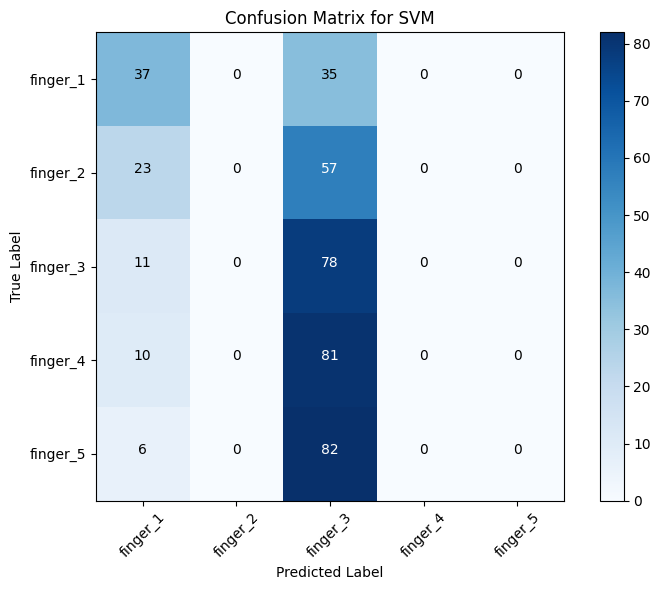

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.colorbar()
tick_marks = np.arange(len(set(y_test_labels)))
plt.xticks(tick_marks, sorted(set(y_test_labels)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_test_labels)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


kode di atas digunakan untuk menghasilkan dan menampilkan confusion matrixPertama, confusion matrix dibuat menggunakan fungsi confusion_matrix dari modul sklearn.metrics. Confusion matrix memberikan gambaran tentang seberapa baik model SVM dapat mengklasifikasikan instance dari setiap kelas, baik dengan benar maupun dengan salah.
Setelah itu, matriks tersebut divisualisasikan menggunakan plot. Ukuran plot disesuaikan untuk memastikan visualisasi yang jelas. Label pada sumbu-x dan sumbu-y disesuaikan dengan label yang muncul dalam data pengujian. Setiap sel dalam plot mewakili jumlah sampel yang diklasifikasikan dengan benar atau salah oleh model.
Teks ditambahkan ke dalam setiap sel plot untuk menampilkan jumlah sampel yang sesuai dengan masing-masing kombinasi label prediksi dan label asli.